In [1]:
import sys
from pathlib import Path

# Make ../src importable if you later use it
PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nfl_data_py as nfl

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

SEASONS = [2022, 2023, 2024]

PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)

print("CWD:", Path.cwd())
print("Project root:", PROJECT_ROOT)
print("Processed dir:", PROCESSED_DIR)

CWD: /Users/klevy/Documents/fourth_down/notebooks
Project root: /Users/klevy/Documents/fourth_down
Processed dir: /Users/klevy/Documents/fourth_down/data/processed


In [2]:
pbp = nfl.import_pbp_data(SEASONS, downcast=True, cache=False)
print("Loaded pbp:", pbp.shape)

pbp.head()

2022 done.
2023 done.
2024 done.
Downcasting floats.
Loaded pbp: (148591, 397)


,play_id,game_id,old_game_id_x,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,...,play_clock,play_deleted,play_type_nfl,special_teams_play,st_play_type,end_clock_time,end_yard_line,fixed_drive,fixed_drive_result,drive_real_start_time,drive_play_count,drive_time_of_possession,drive_first_downs,drive_inside20,drive_ended_with_score,drive_quarter_start,drive_quarter_end,drive_yards_penalized,drive_start_transition,drive_end_transition,drive_game_clock_start,drive_game_clock_end,drive_start_yard_line,drive_end_yard_line,drive_play_id_started,drive_play_id_ended,away_score,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,aborted_play,success,passer,passer_jersey_number,rusher,rusher_jersey_number,receiver,receiver_jersey_number,pass,rush,first_down,special,play,passer_id,rusher_id,receiver_id,name,jersey_number,id,fantasy_player_name,fantasy_player_id,fantasy,fantasy_id,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe,nflverse_game_id,old_game_id_y,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type,offense_names,defense_names,offense_positions,defense_positions,offense_numbers,defense_numbers
0,1.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,None,None,None,None,NaN,2022-09-11,900.0,1800.0,3600.0,Half1,0.0,NaN,0.0,1.0,NaN,0,15:00,BAL 35,0.0,NaN,GAME,None,NaN,0.0,0.0,NaN,0.0,0.0,0.0,None,None,NaN,NaN,None,None,None,NaN,None,None,3.0,3.0,NaN,None,None,None,None,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.474098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.546262,0.453738,0.546262,0.453738,0.000000,0.000000,0.000000,NaN,...,0,0.0,GAME_START,0.0,None,None,None,1.0,Punt,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,NaN,NaN,24,9,Home,-15,33,-6.5,44.0,0,outdoors,fieldturf,NaN,NaN,Robert Saleh,John Harbaugh,NYC01,MetLife Stadium,0.0,0.0,None,NaN,None,NaN,None,NaN,0.0,0.0,NaN,0.0,0.0,None,None,None,None,NaN,None,None,None,None,None,0.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022_01_BAL_NYJ,2022091107,,None,None,NaN,None,NaN,,,,0.0,0.0,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,43.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,BAL,35.0,2022-09-11,900.0,1800.0,3600.0,Half1,0.0,1.0,0.0,1.0,NaN,0,15:00,BAL 35,0.0,14.0,9-J.Tucker kic

In [3]:
pbp_plays = pbp[pbp["play_type"].notna()].copy()
pbp_plays = pbp_plays[pbp_plays["down"].isin([1,2,3,4])].copy()

print("Filtered plays:", pbp_plays.shape)

# Check key columns exist
key_cols = ["season","week","game_id","play_id","posteam","defteam","home_team","away_team",
            "qtr","down","ydstogo","yardline_100","game_seconds_remaining","play_type","desc"]
missing = [c for c in key_cols if c not in pbp_plays.columns]
print("Missing key cols:", missing)

pbp_plays[key_cols].head(5)

Filtered plays: (124981, 397)
Missing key cols: []


,season,week,game_id,play_id,posteam,defteam,home_team,away_team,qtr,down,ydstogo,yardline_100,game_seconds_remaining,play_type,desc
2,2022,1,2022_01_BAL_NYJ,68.0,NYJ,BAL,NYJ,BAL,1.0,1.0,10.0,78.0,3596.0,run,(14:56) 32-Mi.Carter left end to NYJ 41 for 19...
3,2022,1,2022_01_BAL_NYJ,89.0,NYJ,BAL,NYJ,BAL,1.0,1.0,10.0,59.0,3569.0,pass,"(14:29) (No Huddle, Shotgun) 19-J.Flacco pass ..."
4,2022,1,2022_01_BAL_NYJ,115.0,NYJ,BAL,NYJ,BAL,1.0,2.0,10.0,59.0,3565.0,run,(14:25) (No Huddle) 32-Mi.Carter left end to N...
5,2022,1,2022_01_BAL_NYJ,136.0,NYJ,BAL,NYJ,BAL,1.0,3.0,5.0,54.0,3541.0,pass,"(14:01) (No Huddle, Shotgun) 19-J.Flacco pass ..."
6,2022,1,2022_01_BAL_NYJ,172.0,NYJ,BAL,NYJ,BAL,1.0,4.0,15.0,64.0,3533.0,punt,"(13:53) 7-B.Mann punts 45 yards to BAL 19, Cen..."


In [4]:
def as_bool(s):
    """Robust conversion for columns that might be 0/1/NaN floats, bools, or missing."""
    if s is None:
        return None
    if str(s.dtype) in ("bool", "boolean"):
        return s.fillna(False)
    return s.fillna(0).astype(int).astype(bool)

fourth = pbp_plays[pbp_plays["down"] == 4].copy()
print("4th-down rows:", len(fourth))
fourth[["game_id","play_id","posteam","ydstogo","yardline_100","play_type"]].head()

4th-down rows: 13041


,game_id,play_id,posteam,ydstogo,yardline_100,play_type
6,2022_01_BAL_NYJ,172.0,NYJ,15.0,64.0,punt
14,2022_01_BAL_NYJ,368.0,BAL,1.0,51.0,punt
21,2022_01_BAL_NYJ,533.0,NYJ,9.0,82.0,punt
25,2022_01_BAL_NYJ,617.0,BAL,9.0,65.0,punt
32,2022_01_BAL_NYJ,790.0,BAL,3.0,6.0,field_goal


In [5]:
fourth["decision"] = "other"

# Punt / FG attempts if columns exist
if "punt_attempt" in fourth.columns:
    fourth.loc[as_bool(fourth["punt_attempt"]), "decision"] = "punt"

if "field_goal_attempt" in fourth.columns:
    fourth.loc[as_bool(fourth["field_goal_attempt"]), "decision"] = "field_goal"

# Go-for-it mask (safe even if pass_attempt/rush_attempt missing)
pass_att = as_bool(fourth.get("pass_attempt"))
rush_att = as_bool(fourth.get("rush_attempt"))

go_mask = False
if pass_att is not None:
    go_mask = go_mask | pass_att
if rush_att is not None:
    go_mask = go_mask | rush_att

go_mask = go_mask | fourth["play_type"].isin(["run", "pass", "sack", "qb_kneel", "qb_spike"])

fourth.loc[(fourth["decision"] == "other") & go_mask, "decision"] = "go_for_it"

fourth["decision"].value_counts(dropna=False)

decision
punt          6765
field_goal    3107
go_for_it     2429
other          740
Name: count, dtype: int64

In [6]:
print("Total plays:", len(pbp_plays))
print("4th downs:", len(fourth))

print("\nDecision share:")
print(fourth["decision"].value_counts(normalize=True).round(3))

# Decision counts by field position bin
bins = pd.cut(fourth["yardline_100"], bins=[0,10,20,30,40,50,60,70,80,90,100], include_lowest=True)
decision_by_field = (
    fourth.groupby([bins, "decision"]).size().unstack(fill_value=0)
)
decision_by_field

Total plays: 124981
4th downs: 13041

Decision share:
decision
punt          0.519
field_goal    0.238
go_for_it     0.186
other         0.057
Name: proportion, dtype: float64


/var/folders/l0/jdg4bp7x7n7_9s355c6l3bqc0000gn/T/ipykernel_66472/4228383116.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fourth.groupby([bins, "decision"]).size().unstack(fill_value=0)


decision,field_goal,go_for_it,other,punt
yardline_100,,,,
"(-0.001, 10.0]",647,351,71,0
"(10.0, 20.0]",881,236,47,0
"(20.0, 30.0]",846,284,65,2
"(30.0, 40.0]",706,450,108,131
"(40.0, 50.0]",27,413,130,901
"(50.0, 60.0]",0,284,121,1305
"(60.0, 70.0]",0,271,104,1855
"(70.0, 80.0]",0,95,59,1573
"(80.0, 90.0]",0,40,26,792


/var/folders/l0/jdg4bp7x7n7_9s355c6l3bqc0000gn/T/ipykernel_66472/4251393927.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  go_rate = fourth.groupby(ytg_bins)["decision"].apply(lambda s: (s == "go_for_it").mean())


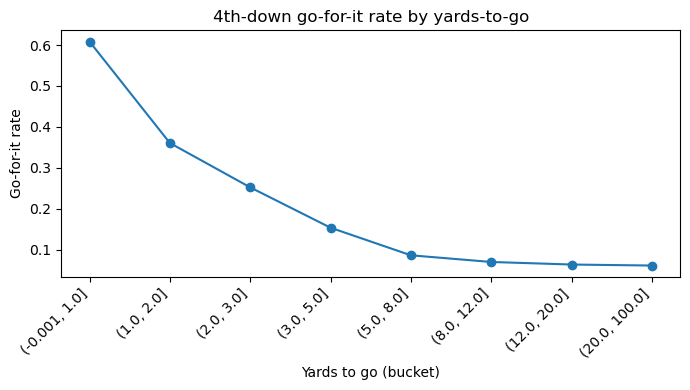

In [7]:
ytg_bins = pd.cut(fourth["ydstogo"], bins=[0,1,2,3,5,8,12,20,100], include_lowest=True)
go_rate = fourth.groupby(ytg_bins)["decision"].apply(lambda s: (s == "go_for_it").mean())

plt.figure(figsize=(7,4))
plt.plot(go_rate.index.astype(str), go_rate.values, marker="o")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Go-for-it rate")
plt.xlabel("Yards to go (bucket)")
plt.title("4th-down go-for-it rate by yards-to-go")
plt.tight_layout()
plt.show()

In [8]:
pbp_plays_path = PROCESSED_DIR / "pbp_plays.parquet"
fourth_path = PROCESSED_DIR / "fourth_down.parquet"

pbp_plays.to_parquet(pbp_plays_path, index=False)
fourth.to_parquet(fourth_path, index=False)

print("Saved:")
print("-", pbp_plays_path)
print("-", fourth_path)

print("File exists checks:", pbp_plays_path.exists(), fourth_path.exists())

Saved:
- /Users/klevy/Documents/fourth_down/data/processed/pbp_plays.parquet
- /Users/klevy/Documents/fourth_down/data/processed/fourth_down.parquet
File exists checks: True True
